**Name:** Romika 

**Course:** Advanced Big Data and Data Mining

**Lab Assignment:** Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook


In [2]:
import pandas as pd

# Load dataset
file_path = 'C:/Users/public/Auto Sales data.csv'  # adjust path if needed
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


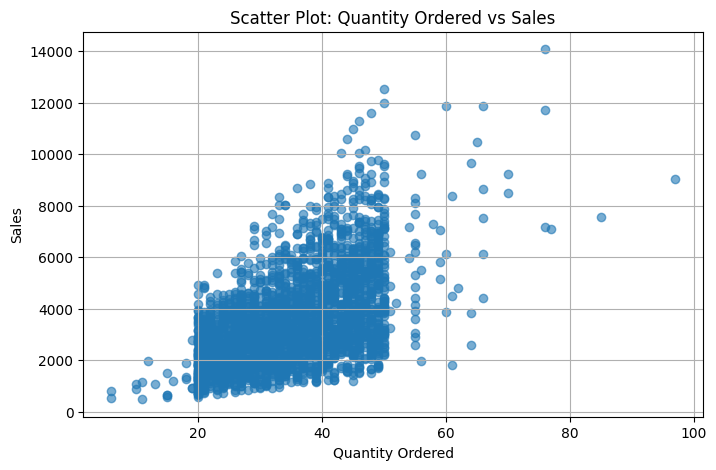

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df['QUANTITYORDERED'], df['SALES'], alpha=0.6)
plt.title('Scatter Plot: Quantity Ordered vs Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


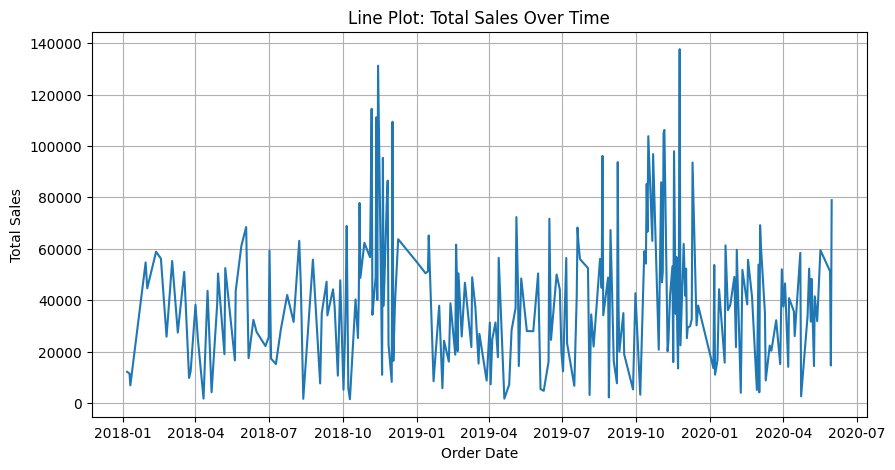

In [4]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], dayfirst=True)

sales_over_time = df.groupby('ORDERDATE')['SALES'].sum().sort_index()

plt.figure(figsize=(10,5))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Line Plot: Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


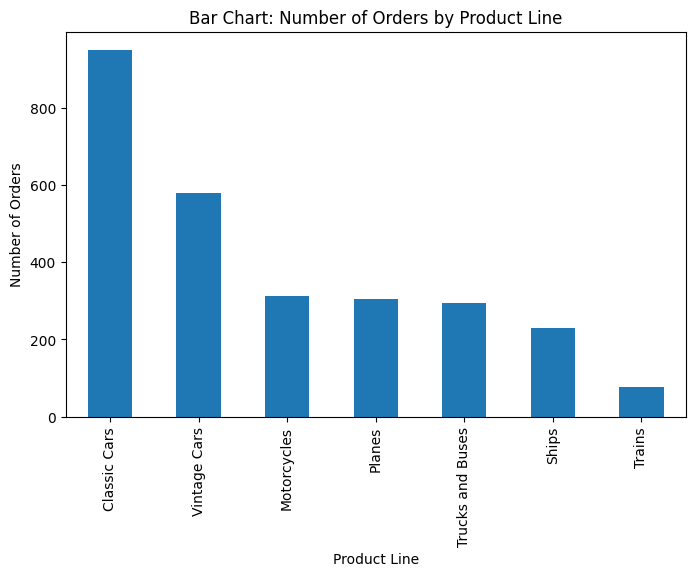

In [5]:
plt.figure(figsize=(8,5))
df['PRODUCTLINE'].value_counts().plot(kind='bar')
plt.title('Bar Chart: Number of Orders by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Number of Orders')
plt.show()


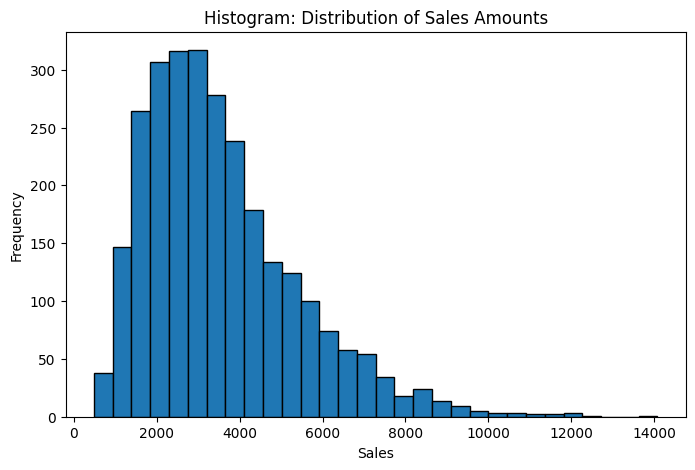

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df['SALES'], bins=30, edgecolor='black')
plt.title('Histogram: Distribution of Sales Amounts')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


<Figure size 800x500 with 0 Axes>

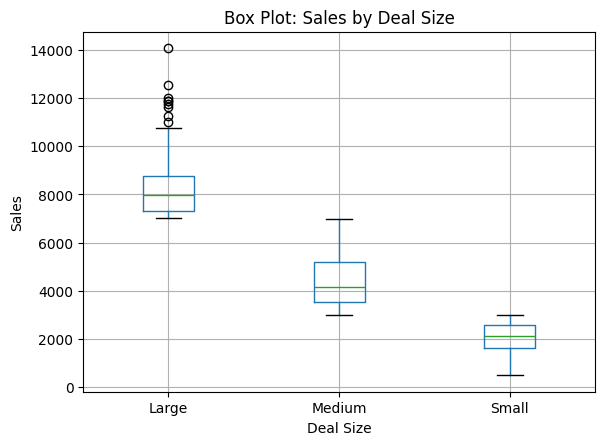

In [7]:
plt.figure(figsize=(8,5))
df.boxplot(column='SALES', by='DEALSIZE')
plt.title('Box Plot: Sales by Deal Size')
plt.suptitle('')  # to remove default title
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show()


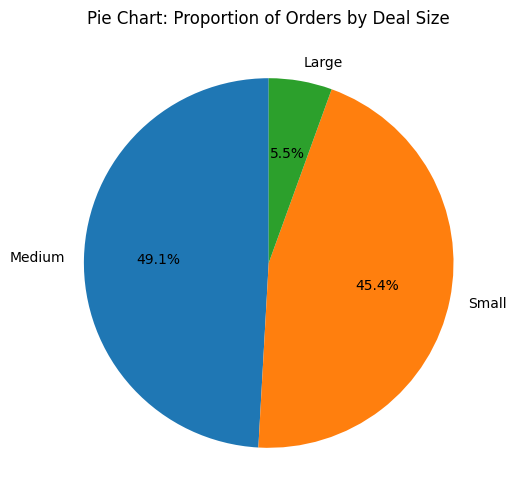

In [8]:
plt.figure(figsize=(6,6))
df['DEALSIZE'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Proportion of Orders by Deal Size')
plt.ylabel('')
plt.show()


In [12]:
# Check missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

# Example: Fill missing numeric values with mean (if any)
# Here, just in case, fill 'SALES' missing with mean
if df['SALES'].isnull().sum() > 0:
    df['SALES'].fillna(df['SALES'].mean(), inplace=True)

# For categorical, fill with mode (example for 'DEALSIZE')
if df['DEALSIZE'].isnull().sum() > 0:
    df['DEALSIZE'].fillna(df['DEALSIZE'].mode()[0], inplace=True)

# Drop any rows still containing missing values (if any)
df.dropna(inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

Missing values after handling:
ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE   

In [13]:
Q1 = df['SALES'].quantile(0.25)
Q3 = df['SALES'].quantile(0.75)
IQR = Q3 - Q1

print(f"IQR for SALES: {IQR}")
print(f"Q1: {Q1}, Q3: {Q3}")

# Identify outliers
outliers = df[(df['SALES'] < (Q1 - 1.5 * IQR)) | (df['SALES'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in SALES: {len(outliers)}")
print(outliers[['SALES']])

# Remove outliers
df_clean = df[~((df['SALES'] < (Q1 - 1.5 * IQR)) | (df['SALES'] > (Q3 + 1.5 * IQR)))]

print(f"\nDataset shape before outlier removal: {df.shape}")
print(f"Dataset shape after outlier removal: {df_clean.shape}")


IQR for SALES: 2298.7449999999994
Q1: 2204.35, Q3: 4503.094999999999
Number of outliers in SALES: 79
         SALES
28    10993.50
30     8014.82
33     9064.89
39     8014.82
41    10172.70
...        ...
2171   8844.12
2225   8209.44
2358   8977.05
2432  10066.60
2559   9558.80

[79 rows x 1 columns]

Dataset shape before outlier removal: (2747, 20)
Dataset shape after outlier removal: (2668, 20)


In [14]:
# Dataset before reduction
print(f"Original dataset shape: {df_clean.shape}")

# Sample 50% of the data (random)
df_sampled = df_clean.sample(frac=0.5, random_state=42)

# Drop columns that might be less relevant for analysis, e.g. customer contact info
cols_to_drop = ['CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
df_reduced = df_sampled.drop(columns=cols_to_drop)

print(f"Dataset shape after reduction (sampling + dropping columns): {df_reduced.shape}")


Original dataset shape: (2668, 20)
Dataset shape after reduction (sampling + dropping columns): (1334, 15)


In [15]:
import numpy as np

# Copy dataset to keep original safe
df_scaled = df_reduced.copy()

# Min-Max Scaling function
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

# Apply scaling manually
df_scaled['SALES_SCALED'] = min_max_scaling(df_scaled['SALES'])
df_scaled['QUANTITYORDERED_SCALED'] = min_max_scaling(df_scaled['QUANTITYORDERED'])

# Discretize 'DAYS_SINCE_LASTORDER' into 3 bins
df_scaled['DAYS_SINCE_LASTORDER_BINS'] = pd.cut(df_scaled['DAYS_SINCE_LASTORDER'], bins=3, labels=['Recent', 'Moderate', 'Old'])

# Display before and after
print("Before scaling and discretization:")
print(df_reduced[['SALES', 'QUANTITYORDERED', 'DAYS_SINCE_LASTORDER']].head())

print("\nAfter scaling and discretization:")
print(df_scaled[['SALES_SCALED', 'QUANTITYORDERED_SCALED', 'DAYS_SINCE_LASTORDER_BINS']].head())


Before scaling and discretization:
        SALES  QUANTITYORDERED  DAYS_SINCE_LASTORDER
340   1685.42               22                   946
1880  2617.16               26                  1883
1645  4441.50               47                  2060
2526  3021.48               44                  2876
989   3937.25               25                  1529

After scaling and discretization:
      SALES_SCALED  QUANTITYORDERED_SCALED DAYS_SINCE_LASTORDER_BINS
340       0.161187                0.179104                    Recent
1880      0.285998                0.238806                  Moderate
1645      0.530378                0.552239                  Moderate
2526      0.340159                0.507463                       Old
989       0.462831                0.223881                  Moderate


In [16]:
# Display info and describe outputs
print("DataFrame Info:")
df_scaled.info()

print("\nStatistical Summary (describe):")
df_scaled.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1334 entries, 340 to 2718
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ORDERNUMBER                1334 non-null   int64         
 1   QUANTITYORDERED            1334 non-null   int64         
 2   PRICEEACH                  1334 non-null   float64       
 3   ORDERLINENUMBER            1334 non-null   int64         
 4   SALES                      1334 non-null   float64       
 5   ORDERDATE                  1334 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER       1334 non-null   int64         
 7   STATUS                     1334 non-null   object        
 8   PRODUCTLINE                1334 non-null   object        
 9   MSRP                       1334 non-null   int64         
 10  PRODUCTCODE                1334 non-null   object        
 11  CITY                       1334 non-null   object       

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP,SALES_SCALED,QUANTITYORDERED_SCALED
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334,1334.000000,1334.000000,1334.000000,1334.000000
mean,10262.865817,34.512744,98.282766,6.467766,3381.087361,2019-05-21 06:17:48.665667072,1762.968516,98.643178,0.388331,0.365862
min,10100.000000,10.000000,29.210000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000,0.000000,0.000000
25%,10183.000000,26.000000,69.130000,3.000000,2156.250000,2018-11-12 00:00:00,1099.000000,68.000000,0.224257,0.238806
50%,10274.000000,34.000000,93.310000,6.000000,3139.165000,2019-07-20 12:00:00,1766.000000,97.000000,0.355924,0.358209
75%,10339.750000,42.000000,122.592500,9.000000,4320.920000,2019-11-23 00:00:00,2428.750000,122.000000,0.514226,0.477612
max,10425.000000,77.000000,248.590000,18.000000,7947.310000,2020-05-31 00:00:00,3530.000000,214.000000,1.000000,1.000000
std,92.507111,9.381842,38.282670,4.220490,1575.711069,NaN,802.620302,38.121496,0.211075,0.140027


In [17]:
numeric_cols = ['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'DAYS_SINCE_LASTORDER', 'MSRP']

for col in numeric_cols:
    print(f"--- {col} ---")
    print(f"Min: {df_scaled[col].min()}")
    print(f"Max: {df_scaled[col].max()}")
    print(f"Mean: {df_scaled[col].mean()}")
    print(f"Median: {df_scaled[col].median()}")
    print(f"Mode: {df_scaled[col].mode()[0]}\n")


--- SALES ---
Min: 482.13
Max: 7947.31
Mean: 3381.0873613193403
Median: 3139.165
Mode: 1030.44

--- QUANTITYORDERED ---
Min: 10
Max: 77
Mean: 34.51274362818591
Median: 34.0
Mode: 25

--- PRICEEACH ---
Min: 29.21
Max: 248.59
Mean: 98.28276611694154
Median: 93.31
Mode: 80.55

--- DAYS_SINCE_LASTORDER ---
Min: 42
Max: 3530
Mean: 1762.9685157421288
Median: 1766.0
Mode: 1098

--- MSRP ---
Min: 33
Max: 214
Mean: 98.6431784107946
Median: 97.0
Mode: 118



In [18]:
for col in numeric_cols:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    range_val = df_scaled[col].max() - df_scaled[col].min()
    variance = df_scaled[col].var()
    std_dev = df_scaled[col].std()
    
    print(f"--- {col} ---")
    print(f"Range: {range_val}")
    print(f"Quartiles: Q1={Q1}, Q3={Q3}")
    print(f"IQR: {IQR}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_dev}\n")


--- SALES ---
Range: 7465.18
Quartiles: Q1=2156.25, Q3=4320.92
IQR: 2164.67
Variance: 2482865.3743568733
Standard Deviation: 1575.7110694403568

--- QUANTITYORDERED ---
Range: 67
Quartiles: Q1=26.0, Q3=42.0
IQR: 16.0
Variance: 88.01896726055575
Standard Deviation: 9.381842423562428

--- PRICEEACH ---
Range: 219.38
Quartiles: Q1=69.13, Q3=122.5925
IQR: 53.462500000000006
Variance: 1465.5628074216268
Standard Deviation: 38.28266980529998

--- DAYS_SINCE_LASTORDER ---
Range: 3488
Quartiles: Q1=1099.0, Q3=2428.75
IQR: 1329.75
Variance: 644199.3493455822
Standard Deviation: 802.6203021015492

--- MSRP ---
Range: 181
Quartiles: Q1=68.0, Q3=122.0
IQR: 54.0
Variance: 1453.2484267993534
Standard Deviation: 38.121495600243094



In [19]:
corr_matrix = df_scaled[numeric_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                         SALES  QUANTITYORDERED  PRICEEACH  \
SALES                 1.000000         0.547512   0.791622   
QUANTITYORDERED       0.547512         1.000000  -0.030428   
PRICEEACH             0.791622        -0.030428   1.000000   
DAYS_SINCE_LASTORDER -0.311518        -0.029176  -0.359108   
MSRP                  0.630452        -0.015404   0.781189   

                      DAYS_SINCE_LASTORDER      MSRP  
SALES                            -0.311518  0.630452  
QUANTITYORDERED                  -0.029176 -0.015404  
PRICEEACH                        -0.359108  0.781189  
DAYS_SINCE_LASTORDER              1.000000 -0.487158  
MSRP                             -0.487158  1.000000  
